In [1]:
import numpy as np
import pandas as pd
from scipy.stats import beta
import matplotlib.pyplot as plt

Random seed for reproducability

In [2]:
np.random.seed(42)

**Click-through rate** - for the sake of the exercise, I assume a prior of approximately 8% CTR for both variants of to-be-tested emails. (the prior can be estimated/known from previous research of the company) 

In [3]:
# prior parameters
clicked, not_clicked = 1, 11
f"{clicked * 100 / (clicked + not_clicked):.2f}"

'8.33'

In [4]:
# probability vector
p = np.linspace(beta.ppf(0.01, clicked, not_clicked), beta.ppf(0.99, clicked, not_clicked), 100)

### Prior Beta distribution of CTR -Visualization

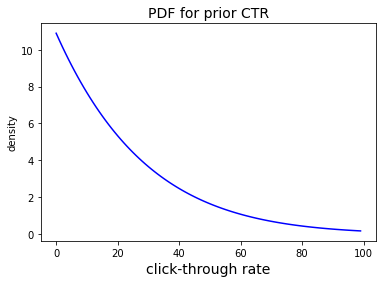

In [5]:
fig, ax = plt.subplots()
ax.plot(beta.pdf(p, clicked, not_clicked), 'b-')
ax.set_title('PDF for prior CTR', size= 14)
ax.set_xlabel('click-through rate', size= 14)
ax.set_ylabel('density');

*Note:* I do not have precise data of prior CTR, therefore I assumed a beta distribution with a higher variance (meaning: $\alpha$ and $\beta$ are small values)

#### Result of Experiment

Empirical CTR

In [6]:
data = {'Email_A': [90, 1000-90], 'Email_B': [110, 1000-110]}
pd.DataFrame(data, index= ['clicked', 'not_clicked'])

,Email_A,Email_B
clicked,90,110
not_clicked,910,890


Posterior is given by prior + likelihood

In [7]:
# posterior parameters for both ads
clicked_A, not_clicked_A = 90 + clicked, 910 + not_clicked
clicked_B, not_clicked_B = 110 + clicked, 890 + not_clicked

### Posterior Beta distribution of CTRs -Visualization

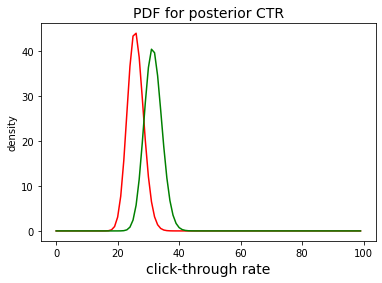

In [8]:
fig, ax = plt.subplots()
ax.plot(beta.pdf(p, clicked_A, not_clicked_A), 'r-') # ad A
ax.plot(beta.pdf(p, clicked_B, not_clicked_B), 'g-') # ad B
ax.set_title('PDF for posterior CTR', size= 14)
ax.set_xlabel('click-through rate', size= 14)
ax.set_ylabel('density');

### Monte Carlo Simulation

In [9]:
n_trials = 10000 # number of samples from each distribution

Beta distribution of ad A & ad B

In [10]:
posterior_A = beta(clicked_A, not_clicked_A)
posterior_B = beta(clicked_B, not_clicked_B)

Draw 10k samples from each distribution

In [11]:
posterior_A_sample = pd.Series([posterior_A.rvs() for _ in range(n_trials)])
posterior_B_sample = pd.Series([posterior_B.rvs() for _ in range(n_trials)])

In [12]:
post_B_win = sum(posterior_B_sample > posterior_A_sample) / n_trials
post_B_win

0.936

**Conclusion:** ~93% of the times email B outperformed email A in terms of CTR.

### Confidence Interval for email A's and email B's true CTR

In [13]:
lower_A = beta.ppf(0.025, clicked_A, not_clicked_A)
upper_A = beta.ppf(0.975, clicked_A, not_clicked_A)

lower_B = beta.ppf(0.025, clicked_B, not_clicked_B)
upper_B = beta.ppf(0.975, clicked_B, not_clicked_B)

In [14]:
f"The 95% Confidence interval for true conversion rate from email A is between {lower_A:.3f} and {upper_A:.3f}."

'The 95% Confidence interval for true conversion rate from email A is between 0.073 and 0.108.'

In [15]:
f"The 95% Confidence interval for true conversion rate from email B is between {lower_B:.3f} and {upper_B:.3f}."

'The 95% Confidence interval for true conversion rate from email B is between 0.091 and 0.130.'

### Relative Performance of email B to email A

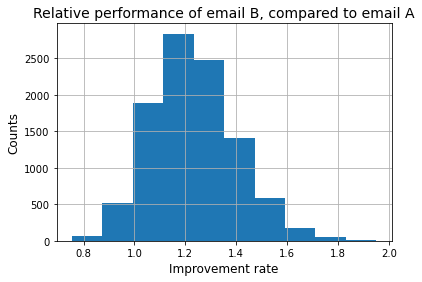

In [16]:
relative_performance_B = posterior_B_sample / posterior_A_sample
relative_performance_B.hist()
plt.title('Relative performance of email B, compared to email A', size= 14);
plt.xlabel('Improvement rate', size= 12);
plt.ylabel('Counts', size= 12);

**~ 1.2x improvement of CTR (compared to email A) is most likely.**